In [1]:
import tensorflow as tf

In [5]:
hello=tf.constant('Hello, TensorFlow!')

In [6]:
sess=tf.Session()

In [7]:
print(sess.run(hello))

b'Hello, TensorFlow!'


In [8]:
hello


<tf.Tensor 'Const_1:0' shape=() dtype=string>

In [9]:
x=tf.placeholder(tf.int32)

In [10]:
y=tf.placeholder(tf.int32)

In [11]:
add=tf.add(x,y)

In [20]:
sub=tf.subtract(x,y)
mul=tf.multiply(x,y)

In [21]:
with tf.Session() as sess:
    print(sess.run(add,feed_dict={x:20,y:30}))
    print(sess.run(sub, feed_dict={x:15,y:200}))

50
-185


In [23]:
import numpy as np

In [24]:
a=np.array([[5.0,5.0]])
b=np.array([[2.0],[2.0]])

In [25]:
a

array([[ 5.,  5.]])

In [26]:
b

array([[ 2.],
       [ 2.]])

In [27]:
mat1=tf.constant(a)
mat2=tf.constant(b)

In [28]:
matrix_multi=tf.matmul(mat1,mat2)

In [32]:
with tf.Session() as sess:
    result=sess.run(matrix_multi)
    print(result)

[[ 20.]]


In [33]:
from tensorflow.examples.tutorials.mnist import input_data

In [35]:
mnist=input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [36]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [41]:
mnist.train.images[2].reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [42]:
import matplotlib.pyplot as plt

In [43]:
%matplotlib inline

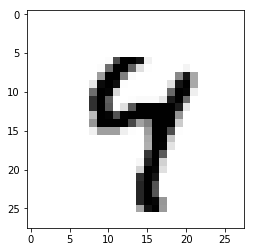

In [47]:
plt.imshow(mnist.train.images[2].reshape(28,28),cmap="Greys")

In [48]:
learning_rate=0.001

In [49]:
training_epochs=15

In [50]:
batch_size=100

In [51]:
n_classes=10 #10 possible outcomes 0-9
n_samples= mnist.train.num_examples

In [52]:
n_samples

55000

In [53]:
n_input=784    #The image is saved in 784 pixels (=28*28)

In [55]:
n_hidden_1=256        # Common for pictures: 8bit colour storage

In [56]:
n_hidden_2=256


In [73]:
def multilayer_perceptron(x,weights,biases):
    """
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: dict of bias values
    """
    
    #First Hidden Layer with RELU Activation-function
    #X*weight+biad
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    #function(X*Weight + bias)           Function=RELU
    layer_1=tf.nn.relu(layer_1)
    
    #Second Hidden Layer
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    #function(X*Weight + bias)           Function=RELU
    layer_2=tf.nn.relu(layer_1)
    
    #Output Layer
    out_layer=tf.matmul(layer_2,weights['out'])+biases['out']
    
    return out_layer

In [74]:
weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    #n_input = 784, n_hidden_1 = 256
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [75]:
weights

{'h1': <tf.Variable 'Variable_12:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_13:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_14:0' shape=(256, 10) dtype=float32_ref>}

In [76]:
biases={
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [77]:
x=tf.placeholder('float',[None,n_input])

In [78]:
y=tf.placeholder('float',[None,n_classes])

In [79]:
pred=multilayer_perceptron(x,weights,biases)

In [81]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [82]:
#Training the model

mnist.train.next_batch(10)

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]))

In [83]:
sess=tf.InteractiveSession()

In [85]:
init=tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [86]:
sess.run(init)

In [90]:
#15 loops
for epoch in range(training_epochs):
    avg_cost=0.0
    total_batch=int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x, batch_y=mnist.train.next_batch(batch_size)
        _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost += c/total_batch
    print("Epoch: {} cost{:.4f}".format(epoch+1,avg_cost))
print("Model has completed {} Epoches of training".format(training_epochs))

Epoch: 1 cost0.2146
Epoch: 2 cost0.1652
Epoch: 3 cost0.1392
Epoch: 4 cost0.1171
Epoch: 5 cost0.0993
Epoch: 6 cost0.0750
Epoch: 7 cost0.0581
Epoch: 8 cost0.0532
Epoch: 9 cost0.0435
Epoch: 10 cost0.0292
Epoch: 11 cost0.0299
Epoch: 12 cost0.0282
Epoch: 13 cost0.0344
Epoch: 14 cost0.0274
Epoch: 15 cost0.0195
Model has completed 15 Epoches of training


In [91]:
# Model Evaluation
correct_predictions=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [94]:
print(correct_predictions)

Tensor("Equal:0", shape=(?,), dtype=bool)


In [95]:
correct_predictions=tf.cast(correct_predictions,"float")

In [96]:
print(correct_predictions)

Tensor("Cast_1:0", shape=(?,), dtype=float32)


In [97]:
accuracy=tf.reduce_mean(correct_predictions)

In [98]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [99]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [100]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [101]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.95719999